# Correlation test

Date: 8 October 2024<br>
By: Eunhye Yang<br>
Description:<br>
binary vs binary: Chi2 p-value < 0.05<br>
continuous vs continuous: Pearson correlation significant coefficient >= 0.5 or <= -0.5<br>
ordinal vs ordinal: Spearman's rank significant p-value < 0.05<br>
categorical vs categorical: Cramer's V p-value < 0.05<br>
binary vs continuous: Point Biserial correlation significant p-value < 0.05<br>
binary vs ordinal: Point Biserial correlation significant p-value < 0.05<br>
binary vs categorical: Cramer's V significant p-value < 0.05<br>
continuous vs ordinal: Spearman's rank significant p-value < 0.05<br>
continuous vs categorical: ANOVA significant p-value < 0.05<br>
ordinal vs categorical: Kruskal-Wallis test significant p-value < 0.05

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chisquare, chi2_contingency, spearmanr, pearsonr, f_oneway, kruskal
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./cleaned_nosurgery_6mmrs.csv')

In [2]:
df.columns

Index(['Age', 'Sex0female1male', 'Race0chinese1nonchinese', 'DM0no1yes',
       'HT0no1yes', 'ISTIA', 'ICH0no1yes', 'IschemicHeartdisease',
       'Atrialfibirllation', 'Antiplateletmedication0no1yes',
       'Anticoagulant0no1warfarin2NOAC', 'Statin0no1Simva2Atorva3Rovu4others',
       'AdmissionGCS', 'Esubscore', 'Vsubscore', 'Msubscore', 'ULpower',
       'LLpower', 'AdmissionsystolicBP', 'AdmissiondiastolicBP',
       'Admissionpulserate', 'CKDclass',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe',
       'Location0supratentorial1infratentorial', 'Laterality0L1R2Central',
       'LARGESTICHVOLUME', 'GRAEBSCORE', 'EverIVH', '@6MmRS', '@6Mmortality',
       'ICHScore', 'mICHScore'],
      dtype='object')

In [3]:
binary = ['Sex0female1male', 'Race0chinese1nonchinese', 'DM0no1yes', 'HT0no1yes', 'ISTIA', 'ICH0no1yes', 'IschemicHeartdisease', 'Atrialfibirllation', 'Antiplateletmedication0no1yes', 'Location0supratentorial1infratentorial', 'EverIVH', '@6Mmortality']
continuous = ['Age', 'AdmissionsystolicBP', 'AdmissiondiastolicBP', 'Admissionpulserate', 'LARGESTICHVOLUME']
ordinal = ['AdmissionGCS', 'Esubscore', 'Vsubscore', 'Msubscore', 'ULpower', 'LLpower', 'CKDclass', 'GRAEBSCORE', '@6MmRS', 'ICHScore', 'mICHScore']
categorical = ['Anticoagulant0no1warfarin2NOAC', 'Statin0no1Simva2Atorva3Rovu4others', 'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe', 'Laterality0L1R2Central']

In [4]:
correlation_pvalues = pd.DataFrame(1, columns=df.columns, index=df.columns)
correlation = pd.DataFrame(0, columns=df.columns, index=df.columns)

## Binary vs Binary

In [5]:
for i in binary:
    for j in binary:
        if i == j: continue
        count1 = np.unique(df[i], return_counts=True)[1]
        count2 = np.unique(df[j], return_counts=True)[1]
        coef, p = chisquare(count1, count2)
        correlation_pvalues.loc[j, i] = p
        # if coef >= 0.1 or coef <= -0.1:
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {p}")
            correlation.loc[j, i] = 1

[Significant] Sex0female1male vs Race0chinese1nonchinese: 0.0
[Significant] Sex0female1male vs DM0no1yes: 8.777160400095958e-142
[Significant] Sex0female1male vs HT0no1yes: 1.2951668918719656e-224
[Significant] Sex0female1male vs ISTIA: 0.0
[Significant] Sex0female1male vs ICH0no1yes: 0.0
[Significant] Sex0female1male vs IschemicHeartdisease: 0.0
[Significant] Sex0female1male vs Atrialfibirllation: 0.0
[Significant] Sex0female1male vs Antiplateletmedication0no1yes: 2.0761969954688124e-197
[Significant] Sex0female1male vs Location0supratentorial1infratentorial: 0.0
[Significant] Sex0female1male vs EverIVH: 4.0932160073075306e-44
[Significant] Sex0female1male vs @6Mmortality: 1.94727882890418e-111
[Significant] Race0chinese1nonchinese vs Sex0female1male: 6.636412564183729e-219
[Significant] Race0chinese1nonchinese vs DM0no1yes: 1.1708342278536105e-31
[Significant] Race0chinese1nonchinese vs HT0no1yes: 0.0
[Significant] Race0chinese1nonchinese vs ISTIA: 1.1903464127596328e-07
[Significant

/tmp/ipykernel_3067159/444695119.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.777160400095958e-142' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/444695119.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.636412564183729e-219' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/444695119.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.632364291520459e-103' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/444695119.py:7: FutureWarning: S

## Continuous vs Continuous

In [6]:
for i in continuous:
    for j in continuous:
        if i == j: continue
        mask = ~np.isnan(df[i]) & ~np.isnan(df[j])
        x_clean = df[i].loc[mask]
        y_clean = df[j].loc[mask]
        res = pearsonr(x_clean, y_clean)
        correlation_pvalues.loc[j, i] = res.pvalue
        correlation_pvalues.loc[i, j] = res.pvalue
        # if coef >= 0.5 or coef <= -0.5:
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {coef}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1

[Significant] Age vs AdmissionsystolicBP: 39.92382210137891
[Significant] Age vs AdmissiondiastolicBP: 39.92382210137891
[Significant] Age vs Admissionpulserate: 39.92382210137891
[Significant] Age vs LARGESTICHVOLUME: 39.92382210137891
[Significant] AdmissionsystolicBP vs Age: 39.92382210137891
[Significant] AdmissionsystolicBP vs AdmissiondiastolicBP: 39.92382210137891
[Significant] AdmissionsystolicBP vs Admissionpulserate: 39.92382210137891
[Significant] AdmissionsystolicBP vs LARGESTICHVOLUME: 39.92382210137891
[Significant] AdmissiondiastolicBP vs Age: 39.92382210137891
[Significant] AdmissiondiastolicBP vs AdmissionsystolicBP: 39.92382210137891


/tmp/ipykernel_3067159/2091961426.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0007073952733799786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = res.pvalue
/tmp/ipykernel_3067159/2091961426.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0007073952733799786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[i, j] = res.pvalue
/tmp/ipykernel_3067159/2091961426.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.156824764163297e-32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[i, j] = res.pvalue
/tmp/ipykernel_3067159/20919

[Significant] AdmissiondiastolicBP vs Admissionpulserate: 39.92382210137891
[Significant] AdmissiondiastolicBP vs LARGESTICHVOLUME: 39.92382210137891
[Significant] Admissionpulserate vs Age: 39.92382210137891
[Significant] Admissionpulserate vs AdmissionsystolicBP: 39.92382210137891
[Significant] Admissionpulserate vs AdmissiondiastolicBP: 39.92382210137891
[Significant] Admissionpulserate vs LARGESTICHVOLUME: 39.92382210137891
[Significant] LARGESTICHVOLUME vs Age: 39.92382210137891
[Significant] LARGESTICHVOLUME vs AdmissionsystolicBP: 39.92382210137891
[Significant] LARGESTICHVOLUME vs AdmissiondiastolicBP: 39.92382210137891
[Significant] LARGESTICHVOLUME vs Admissionpulserate: 39.92382210137891


## Ordinal vs Ordinal

In [7]:
for i in ordinal:
    for j in ordinal:
        if i == j: continue
        coef, p = spearmanr(df[i], df[j], nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {coef} p-value={p}")
            correlation.loc[j, i] = 1
        else: print(f"{i} vs {j}: {coef} p-value={p}")

/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.38247493348408e-162' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.382474933483267e-162' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6778572247351504e-98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning

[Significant] AdmissionGCS vs Esubscore: 0.7930900027276082 p-value=2.38247493348408e-162
[Significant] AdmissionGCS vs Vsubscore: 0.9594761728253667 p-value=0.0
[Significant] AdmissionGCS vs Msubscore: 0.8414414453048982 p-value=4.4673322534941556e-201
[Significant] AdmissionGCS vs ULpower: 0.6116618785304085 p-value=3.325787716077762e-75
[Significant] AdmissionGCS vs LLpower: 0.6335736351562773 p-value=3.5263536631576226e-82
[Significant] AdmissionGCS vs CKDclass: -0.12211968084961575 p-value=0.0008373898181550108
[Significant] AdmissionGCS vs GRAEBSCORE: -0.5226039502567396 p-value=1.6276715119247099e-53
[Significant] AdmissionGCS vs @6MmRS: -0.7242281381881704 p-value=3.1873284215592864e-122
[Significant] AdmissionGCS vs ICHScore: -0.7712436378407823 p-value=4.2147589593047936e-148
[Significant] AdmissionGCS vs mICHScore: -0.7683926524940876 p-value=2.3289835574133934e-146
[Significant] Esubscore vs AdmissionGCS: 0.7930900027276083 p-value=2.382474933483267e-162
[Significant] Esubs

/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5263536631576226e-82' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0008373898181550108' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6276715119247099e-53' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/1840308086.py:5: FutureWarning

## Categorical vs Categorical

In [8]:
for i in categorical:
    for j in categorical:
        if i == j: continue
        table = pd.crosstab(df[i], df[j])
        coef, p, _, _ = chi2_contingency(table)
        correlation_pvalues.loc[j, i] = p
        if coef >= 0.5 or coef <= -0.5:
            print(f"[Significant] {i} vs {j}: {p}")
            correlation.loc[j, i] = 1

[Significant] Anticoagulant0no1warfarin2NOAC vs Statin0no1Simva2Atorva3Rovu4others: 9.243149364853124e-09
[Significant] Anticoagulant0no1warfarin2NOAC vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.20478787633451753
[Significant] Anticoagulant0no1warfarin2NOAC vs Laterality0L1R2Central: 0.2864110443832793
[Significant] Statin0no1Simva2Atorva3Rovu4others vs Anticoagulant0no1warfarin2NOAC: 9.243149364853124e-09
[Significant] Statin0no1Simva2Atorva3Rovu4others vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.5548401605362279
[Significant] Statin0no1Simva2Atorva3Rovu4others vs Laterality0L1R2Central: 0.6183081531420764
[Significant] location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe vs Anticoagulant0no1warfarin2NOAC: 0.20478787633451753
[Significant] location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe vs Statin0no1Simva2Atorva3Rovu4others: 0.5548401605362279
[Significant] location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cer

/tmp/ipykernel_3067159/3318446889.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.243149364853124e-09' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/3318446889.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.243149364853124e-09' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/3318446889.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.20478787633451753' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation_pvalues.loc[j, i] = p
/tmp/ipykernel_3067159/3318446889.py:6: FutureWarning: Se

## Binary vs Continuous

In [9]:
for i in binary:
    for j in continuous:
        coef, p = pointbiserialr(df[i], df[j], nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        correlation_pvalues.loc[i, j] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {p}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1

[Significant] Sex0female1male vs Age: 2.9445534752114788e-06
[Significant] Sex0female1male vs AdmissiondiastolicBP: 0.004333365368623112
[Significant] Race0chinese1nonchinese vs Age: 4.3309674134197614e-10
[Significant] Race0chinese1nonchinese vs AdmissionsystolicBP: 1.658596887123965e-05
[Significant] Race0chinese1nonchinese vs AdmissiondiastolicBP: 1.6505710206824462e-06
[Significant] DM0no1yes vs Age: 0.0274951253204936
[Significant] DM0no1yes vs AdmissiondiastolicBP: 0.002740148936475466


[Significant] HT0no1yes vs Age: 0.03609020041607045
[Significant] HT0no1yes vs AdmissionsystolicBP: 0.006284822095323079
[Significant] HT0no1yes vs AdmissiondiastolicBP: 0.038251693321998174
[Significant] HT0no1yes vs LARGESTICHVOLUME: 9.70147834606008e-10
[Significant] ISTIA vs Age: 3.5853523168967032e-06
[Significant] ISTIA vs AdmissiondiastolicBP: 0.013843821653496837
[Significant] ICH0no1yes vs AdmissionsystolicBP: 0.0002962126574875541
[Significant] ICH0no1yes vs AdmissiondiastolicBP: 0.03501691987218988
[Significant] IschemicHeartdisease vs Age: 3.1245016704178573e-06
[Significant] IschemicHeartdisease vs AdmissiondiastolicBP: 0.004939988551505627
[Significant] IschemicHeartdisease vs Admissionpulserate: 0.0048130522798885194
[Significant] IschemicHeartdisease vs LARGESTICHVOLUME: 0.0010230804825585907
[Significant] Atrialfibirllation vs Age: 1.363388049471032e-09
[Significant] Atrialfibirllation vs AdmissionsystolicBP: 0.001030592938536377
[Significant] Atrialfibirllation vs Adm

## Binary vs Ordinal

In [10]:
for i in binary:
    for j in ordinal:
        coef, p = pointbiserialr(df[i], df[j], nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        correlation_pvalues.loc[i, j] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {p}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1
        else: print(f"{i} vs {j}: {p}")

[Significant] Sex0female1male vs AdmissionGCS: 0.018921800265943485
[Significant] Sex0female1male vs Esubscore: 0.041676459341039855
[Significant] Sex0female1male vs Vsubscore: 0.028937107681635033
[Significant] Sex0female1male vs Msubscore: 0.03418865054311067
Sex0female1male vs ULpower: 0.6119110231507437
Sex0female1male vs LLpower: 0.27855039353279387
Sex0female1male vs CKDclass: 0.3452057116165941
Sex0female1male vs GRAEBSCORE: 0.15300536549936533
[Significant] Sex0female1male vs @6MmRS: 0.034900189355213246
[Significant] Sex0female1male vs ICHScore: 0.003553479728690796
[Significant] Sex0female1male vs mICHScore: 0.0029353417149631128
Race0chinese1nonchinese vs AdmissionGCS: 0.1749370352252975
Race0chinese1nonchinese vs Esubscore: 0.141714532454991
Race0chinese1nonchinese vs Vsubscore: 0.6116342745179811
Race0chinese1nonchinese vs Msubscore: 0.07228556807373325
Race0chinese1nonchinese vs ULpower: 0.5075750432890294
Race0chinese1nonchinese vs LLpower: 0.376492261995724
Race0chinese

Race0chinese1nonchinese vs mICHScore: 0.7492967989384344
DM0no1yes vs AdmissionGCS: 0.38680388680944067
DM0no1yes vs Esubscore: 0.10514614615278327
DM0no1yes vs Vsubscore: 0.6795791236244294
DM0no1yes vs Msubscore: 0.38258080246521636
DM0no1yes vs ULpower: 0.8899102192319569
DM0no1yes vs LLpower: 0.6541363387794953
[Significant] DM0no1yes vs CKDclass: 0.0027217253195854
[Significant] DM0no1yes vs GRAEBSCORE: 0.041461415941705576
DM0no1yes vs @6MmRS: 0.053487318864733166
DM0no1yes vs ICHScore: 0.4223484980209664
DM0no1yes vs mICHScore: 0.07993974001914923
[Significant] HT0no1yes vs AdmissionGCS: 1.870971329833367e-05
[Significant] HT0no1yes vs Esubscore: 0.00030052382915282504
[Significant] HT0no1yes vs Vsubscore: 5.073549730940186e-06
[Significant] HT0no1yes vs Msubscore: 0.0006206790920914601
HT0no1yes vs ULpower: 0.10635861852808463
HT0no1yes vs LLpower: 0.0885143576590944
HT0no1yes vs CKDclass: 0.5008425459248148
HT0no1yes vs GRAEBSCORE: 0.059116229449064805
[Significant] HT0no1yes 

## Binary vs Categorical

In [11]:
for i in binary:
    for j in categorical:
        if i == j: continue
        table = pd.crosstab(df[i], df[j])
        coef, p, _, _ = chi2_contingency(table)
        correlation_pvalues.loc[j, i] = p
        if coef >= 0.5 or coef <= -0.5:
            print(f"[Significant] {i} vs {j}: {p}")
            correlation.loc[j, i] = 1

[Significant] Sex0female1male vs Statin0no1Simva2Atorva3Rovu4others: 0.3060930291061713
[Significant] Sex0female1male vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.00035440493633364924
[Significant] Sex0female1male vs Laterality0L1R2Central: 0.710625705629239
[Significant] Race0chinese1nonchinese vs Anticoagulant0no1warfarin2NOAC: 0.439334898262966
[Significant] Race0chinese1nonchinese vs Statin0no1Simva2Atorva3Rovu4others: 0.03257548357685913
[Significant] Race0chinese1nonchinese vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.0010648040259745592
[Significant] Race0chinese1nonchinese vs Laterality0L1R2Central: 0.0818928900668924


[Significant] DM0no1yes vs Anticoagulant0no1warfarin2NOAC: 0.19315830577784393
[Significant] DM0no1yes vs Statin0no1Simva2Atorva3Rovu4others: 1.6681200883275518e-07
[Significant] DM0no1yes vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.0031154676300560466
[Significant] HT0no1yes vs Anticoagulant0no1warfarin2NOAC: 0.002256770095548864
[Significant] HT0no1yes vs Statin0no1Simva2Atorva3Rovu4others: 0.6057065452227397
[Significant] HT0no1yes vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 2.032616230376462e-27
[Significant] HT0no1yes vs Laterality0L1R2Central: 0.3252010348308831
[Significant] ISTIA vs Anticoagulant0no1warfarin2NOAC: 0.004131081940280833
[Significant] ISTIA vs Statin0no1Simva2Atorva3Rovu4others: 1.9246467293679785e-25
[Significant] ISTIA vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 0.06905454300120639
[Significant] ISTIA vs Laterality0L1R2Central: 0.367031065205799
[Significant] ICH0no1yes vs Anticoagulant0no1warfa

## Continuous vs Ordinal

In [12]:
for i in continuous:
    for j in ordinal:
        coef, p = spearmanr(df[i], df[j], nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        correlation_pvalues.loc[i, j] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {coef} p-value={p}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1
        else: print(f"{i} vs {j}: {coef} p-value={p}")

[Significant] Age vs AdmissionGCS: -0.2533646872017402 p-value=2.164403067179875e-12
[Significant] Age vs Esubscore: -0.20926165169993494 p-value=7.928088052893209e-09
[Significant] Age vs Vsubscore: -0.24477590659832443 p-value=1.220866209913245e-11
[Significant] Age vs Msubscore: -0.2063369572080552 p-value=1.2887947196999699e-08
[Significant] Age vs ULpower: -0.14509183742733278 p-value=9.234467651739952e-05
[Significant] Age vs LLpower: -0.17809644193703592 p-value=1.4914881556012256e-06
[Significant] Age vs CKDclass: 0.35772837249351186 p-value=6.5518110238473046e-24
[Significant] Age vs GRAEBSCORE: 0.2604280953196218 p-value=4.966960854586235e-13
[Significant] Age vs @6MmRS: 0.52264397669899 p-value=1.593069545389376e-53
[Significant] Age vs ICHScore: 0.48041950142502965 p-value=2.446076101955403e-44
[Significant] Age vs mICHScore: 0.5315734484641398 p-value=1.2271295068309708e-55
AdmissionsystolicBP vs AdmissionGCS: -0.05510796893970555 p-value=0.1328980543146814
[Significant] A

## Continuous vs Categorical

In [13]:
df['Laterality0L1R2Central'].value_counts(dropna=False)

Laterality0L1R2Central
0.0    394
1.0    340
2.0     11
NaN      1
Name: count, dtype: int64

In [14]:
for i in continuous:
    for j in categorical:
        groups = [df[df[j] == cat][i] for cat in df[j].unique()]
        coef, p = f_oneway(*groups, nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        correlation_pvalues.loc[i, j] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {coef} p-value={p}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1
        else: print(f"{i} vs {j}: {coef} p-value={p}")

[Significant] Age vs Anticoagulant0no1warfarin2NOAC: 14.102883311594065 p-value=9.740688081773463e-07
[Significant] Age vs Statin0no1Simva2Atorva3Rovu4others: 17.637979406361552 p-value=4.552594021757821e-11
[Significant] Age vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 16.18190605786446 p-value=7.04354954947444e-20
Age vs Laterality0L1R2Central: nan p-value=nan
[Significant] AdmissionsystolicBP vs Anticoagulant0no1warfarin2NOAC: 7.611431409846959 p-value=0.0005343790574794591
[Significant] AdmissionsystolicBP vs Statin0no1Simva2Atorva3Rovu4others: 4.5290014658992535 p-value=0.0037177507146364964
[Significant] AdmissionsystolicBP vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 2.6353807300034866 p-value=0.010759683798604851


AdmissionsystolicBP vs Laterality0L1R2Central: nan p-value=nan
[Significant] AdmissiondiastolicBP vs Anticoagulant0no1warfarin2NOAC: 11.062117632720295 p-value=1.845076792857558e-05
[Significant] AdmissiondiastolicBP vs Statin0no1Simva2Atorva3Rovu4others: 11.296540660512418 p-value=2.9801977034812427e-07
[Significant] AdmissiondiastolicBP vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 5.430474638571862 p-value=4.316510026426392e-06
AdmissiondiastolicBP vs Laterality0L1R2Central: nan p-value=nan
[Significant] Admissionpulserate vs Anticoagulant0no1warfarin2NOAC: 5.153597858235994 p-value=0.0059886278875526215
Admissionpulserate vs Statin0no1Simva2Atorva3Rovu4others: 1.9020555722585843 p-value=0.12781571252443552
[Significant] Admissionpulserate vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 3.2650517401912347 p-value=0.0020146472823298987
Admissionpulserate vs Laterality0L1R2Central: nan p-value=nan
LARGESTICHVOLUME vs Anticoagulant0no1warfarin2NOAC

/tmp/ipykernel_3067159/501713809.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  coef, p = f_oneway(*groups, nan_policy='omit')
/tmp/ipykernel_3067159/501713809.py:4: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  coef, p = f_oneway(*groups, nan_policy='omit')
/tmp/ipykernel_3067159/501713809.py:4: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  coef, p = f_oneway(*groups, nan_policy='omit')
/tmp/ipykernel_3067159/501713809.py:4: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  coef, p = f_oneway(*groups, nan_policy='omit')
/tmp/ipyk

## Ordinal vs Categorical

In [15]:
for i in ordinal:
    for j in categorical:
        coef, p = kruskal(df[i], df[j], nan_policy='omit')
        correlation_pvalues.loc[j, i] = p
        correlation_pvalues.loc[i, j] = p
        if p < 0.05:
            print(f"[Significant] {i} vs {j}: {coef} p-value={p}")
            correlation.loc[j, i] = 1
            correlation.loc[i, j] = 1
        else: print(f"{i} vs {j}: {coef} p-value={p}")

[Significant] AdmissionGCS vs Anticoagulant0no1warfarin2NOAC: 1262.9264111178454 p-value=1.2880186103288504e-276
[Significant] AdmissionGCS vs Statin0no1Simva2Atorva3Rovu4others: 1204.0981115980212 p-value=7.846327309574629e-264
[Significant] AdmissionGCS vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 974.1356220452542 p-value=7.521821485691072e-214
[Significant] AdmissionGCS vs Laterality0L1R2Central: 1174.5023650179392 p-value=2.1217591011358133e-257
[Significant] Esubscore vs Anticoagulant0no1warfarin2NOAC: 1253.1589078500808 p-value=1.7084088164501389e-274
[Significant] Esubscore vs Statin0no1Simva2Atorva3Rovu4others: 1120.8147656558588 p-value=9.884450686640274e-246
[Significant] Esubscore vs location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe: 90.72243376388754 p-value=1.6530832261025895e-21
[Significant] Esubscore vs Laterality0L1R2Central: 1052.5328756891356 p-value=6.851735933054059e-231
[Significant] Vsubscore vs Anticoagulant0no1warfarin2NOAC: 11

## Matrix evaluation

In [16]:
df.columns

Index(['Age', 'Sex0female1male', 'Race0chinese1nonchinese', 'DM0no1yes',
       'HT0no1yes', 'ISTIA', 'ICH0no1yes', 'IschemicHeartdisease',
       'Atrialfibirllation', 'Antiplateletmedication0no1yes',
       'Anticoagulant0no1warfarin2NOAC', 'Statin0no1Simva2Atorva3Rovu4others',
       'AdmissionGCS', 'Esubscore', 'Vsubscore', 'Msubscore', 'ULpower',
       'LLpower', 'AdmissionsystolicBP', 'AdmissiondiastolicBP',
       'Admissionpulserate', 'CKDclass',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe',
       'Location0supratentorial1infratentorial', 'Laterality0L1R2Central',
       'LARGESTICHVOLUME', 'GRAEBSCORE', 'EverIVH', '@6MmRS', '@6Mmortality',
       'ICHScore', 'mICHScore'],
      dtype='object')

In [17]:
correlation_pvalues = correlation_pvalues.drop(['@6MmRS', '@6Mmortality', 'ICHScore', 'mICHScore'], axis=1)
correlation_pvalues = correlation_pvalues.drop(['@6MmRS', '@6Mmortality', 'ICHScore', 'mICHScore'], axis=0)

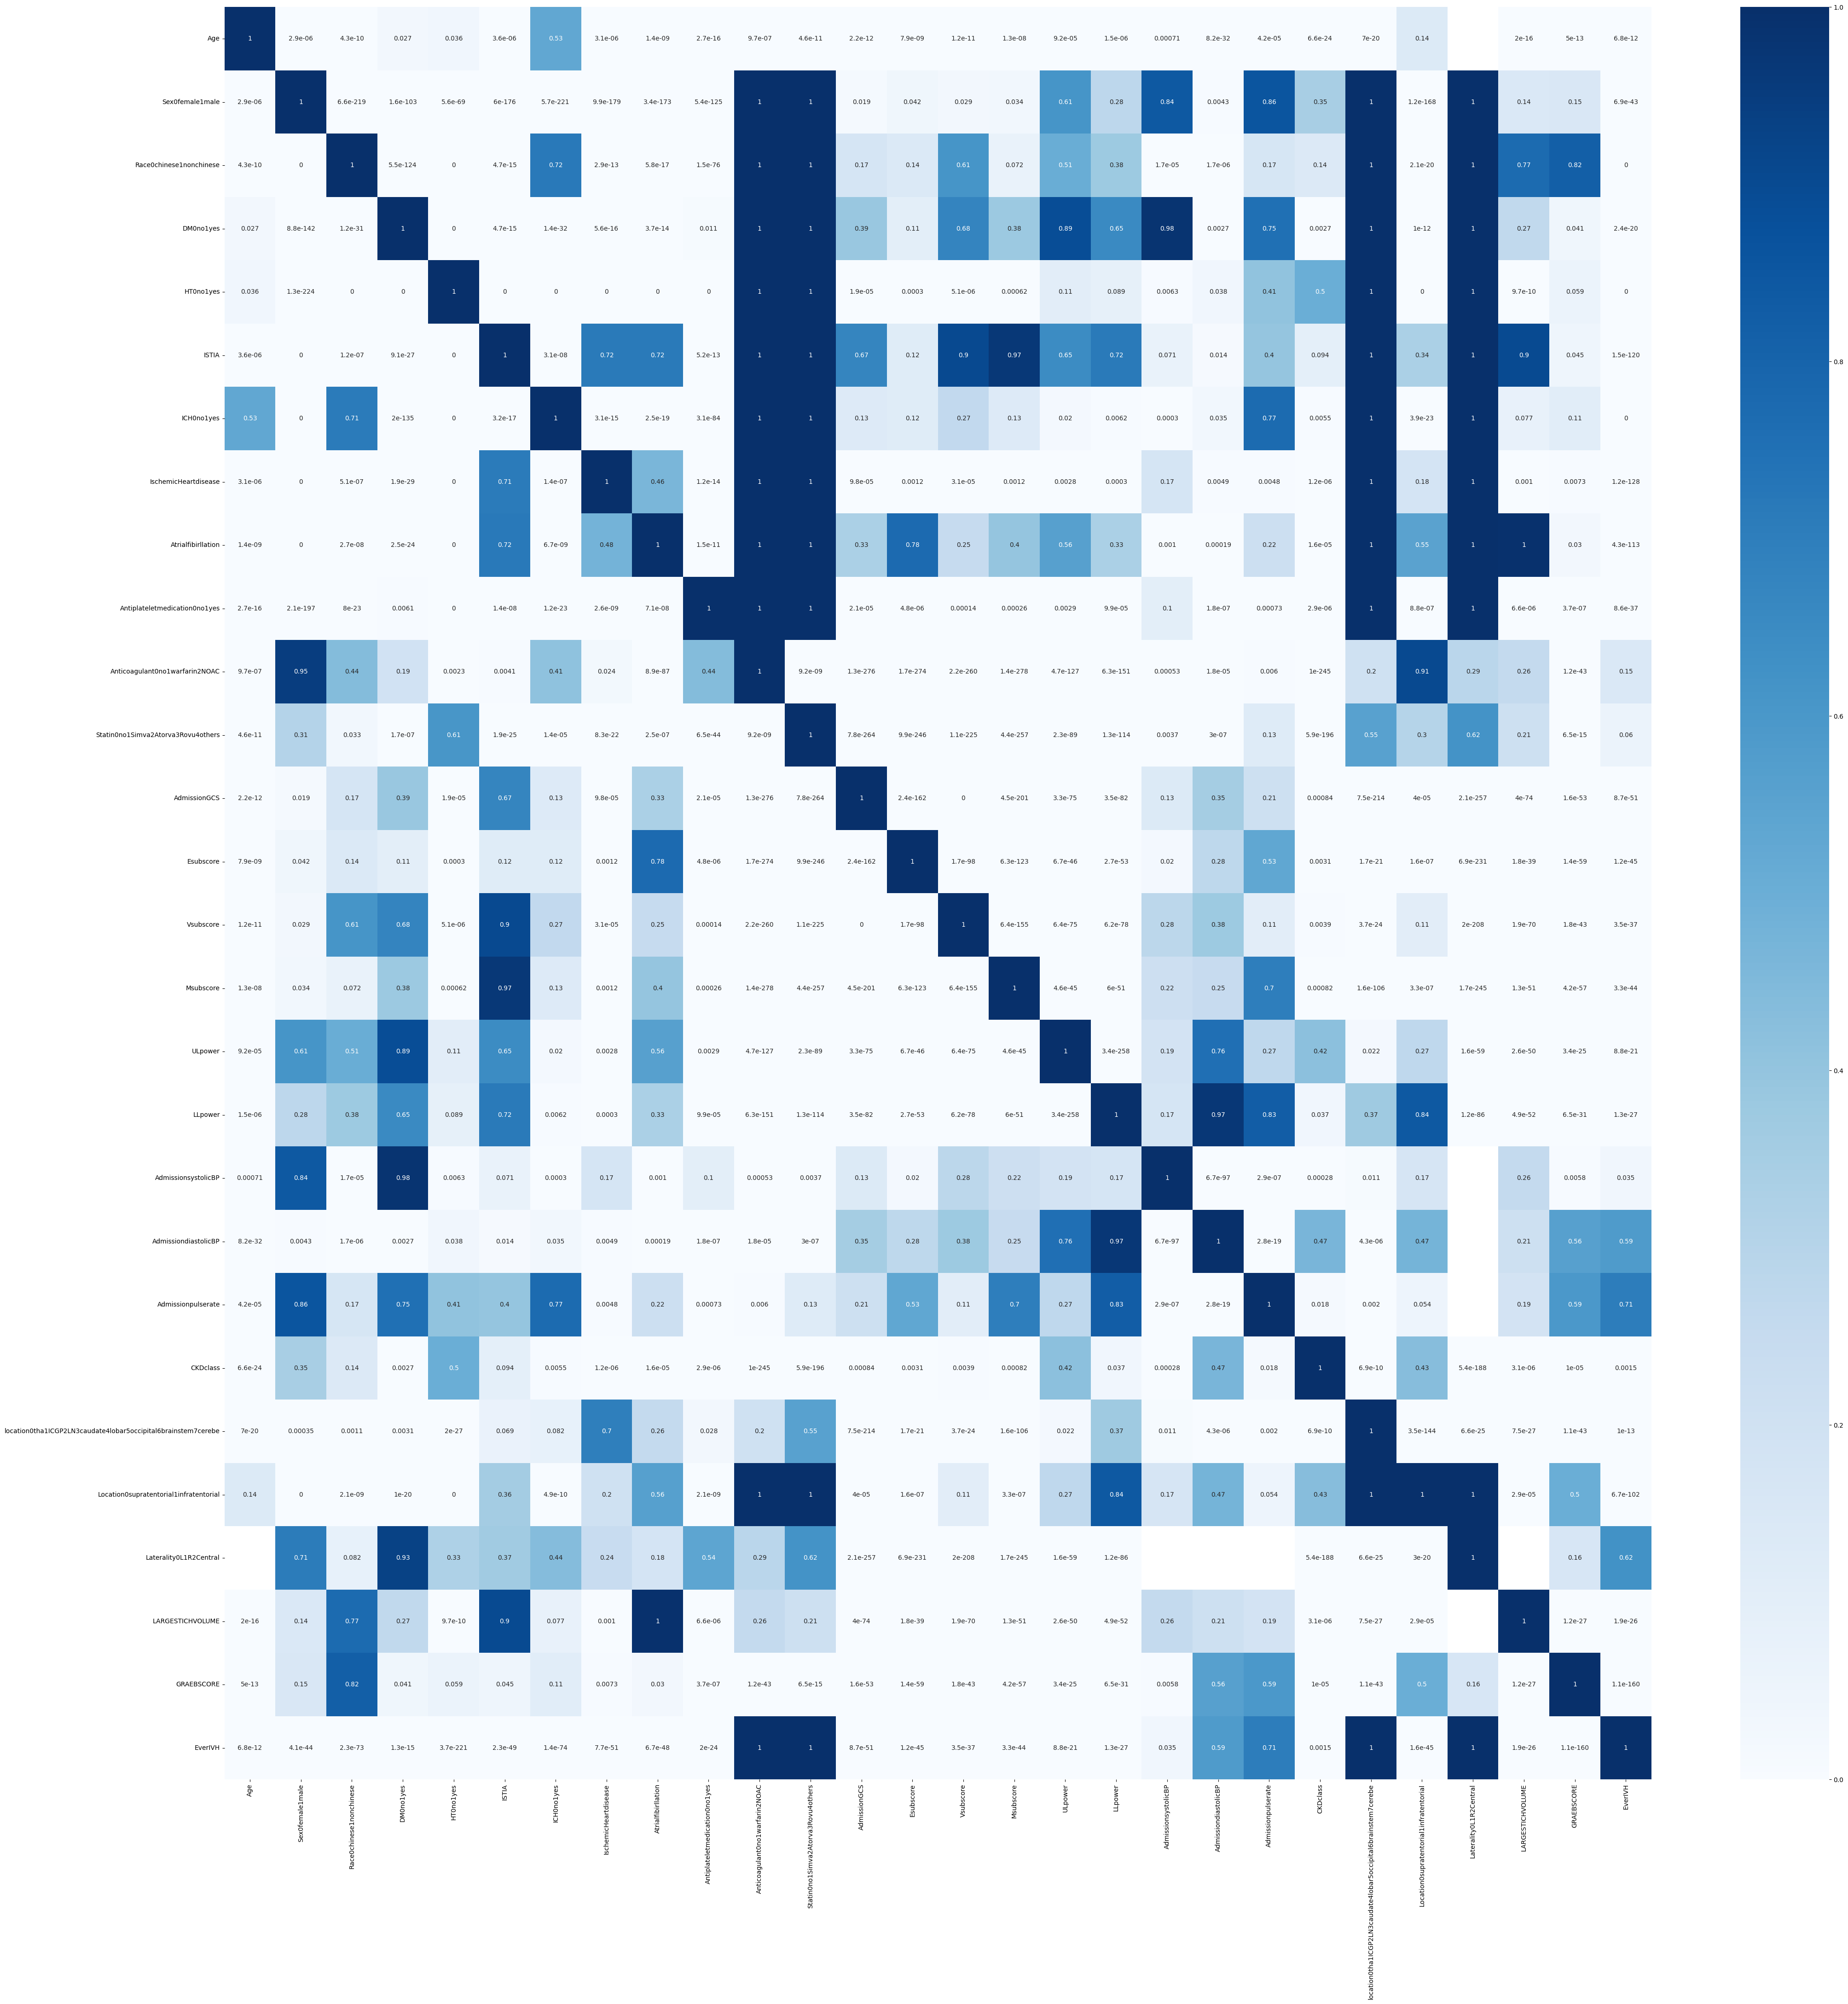

In [18]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlation_pvalues, annot=True, cmap='Blues', ax=ax)
plt.show()

In [19]:
correlation = correlation.drop(['@6MmRS', '@6Mmortality', 'ICHScore', 'mICHScore'], axis=1)
correlation = correlation.drop(['@6MmRS', '@6Mmortality', 'ICHScore', 'mICHScore'], axis=0)

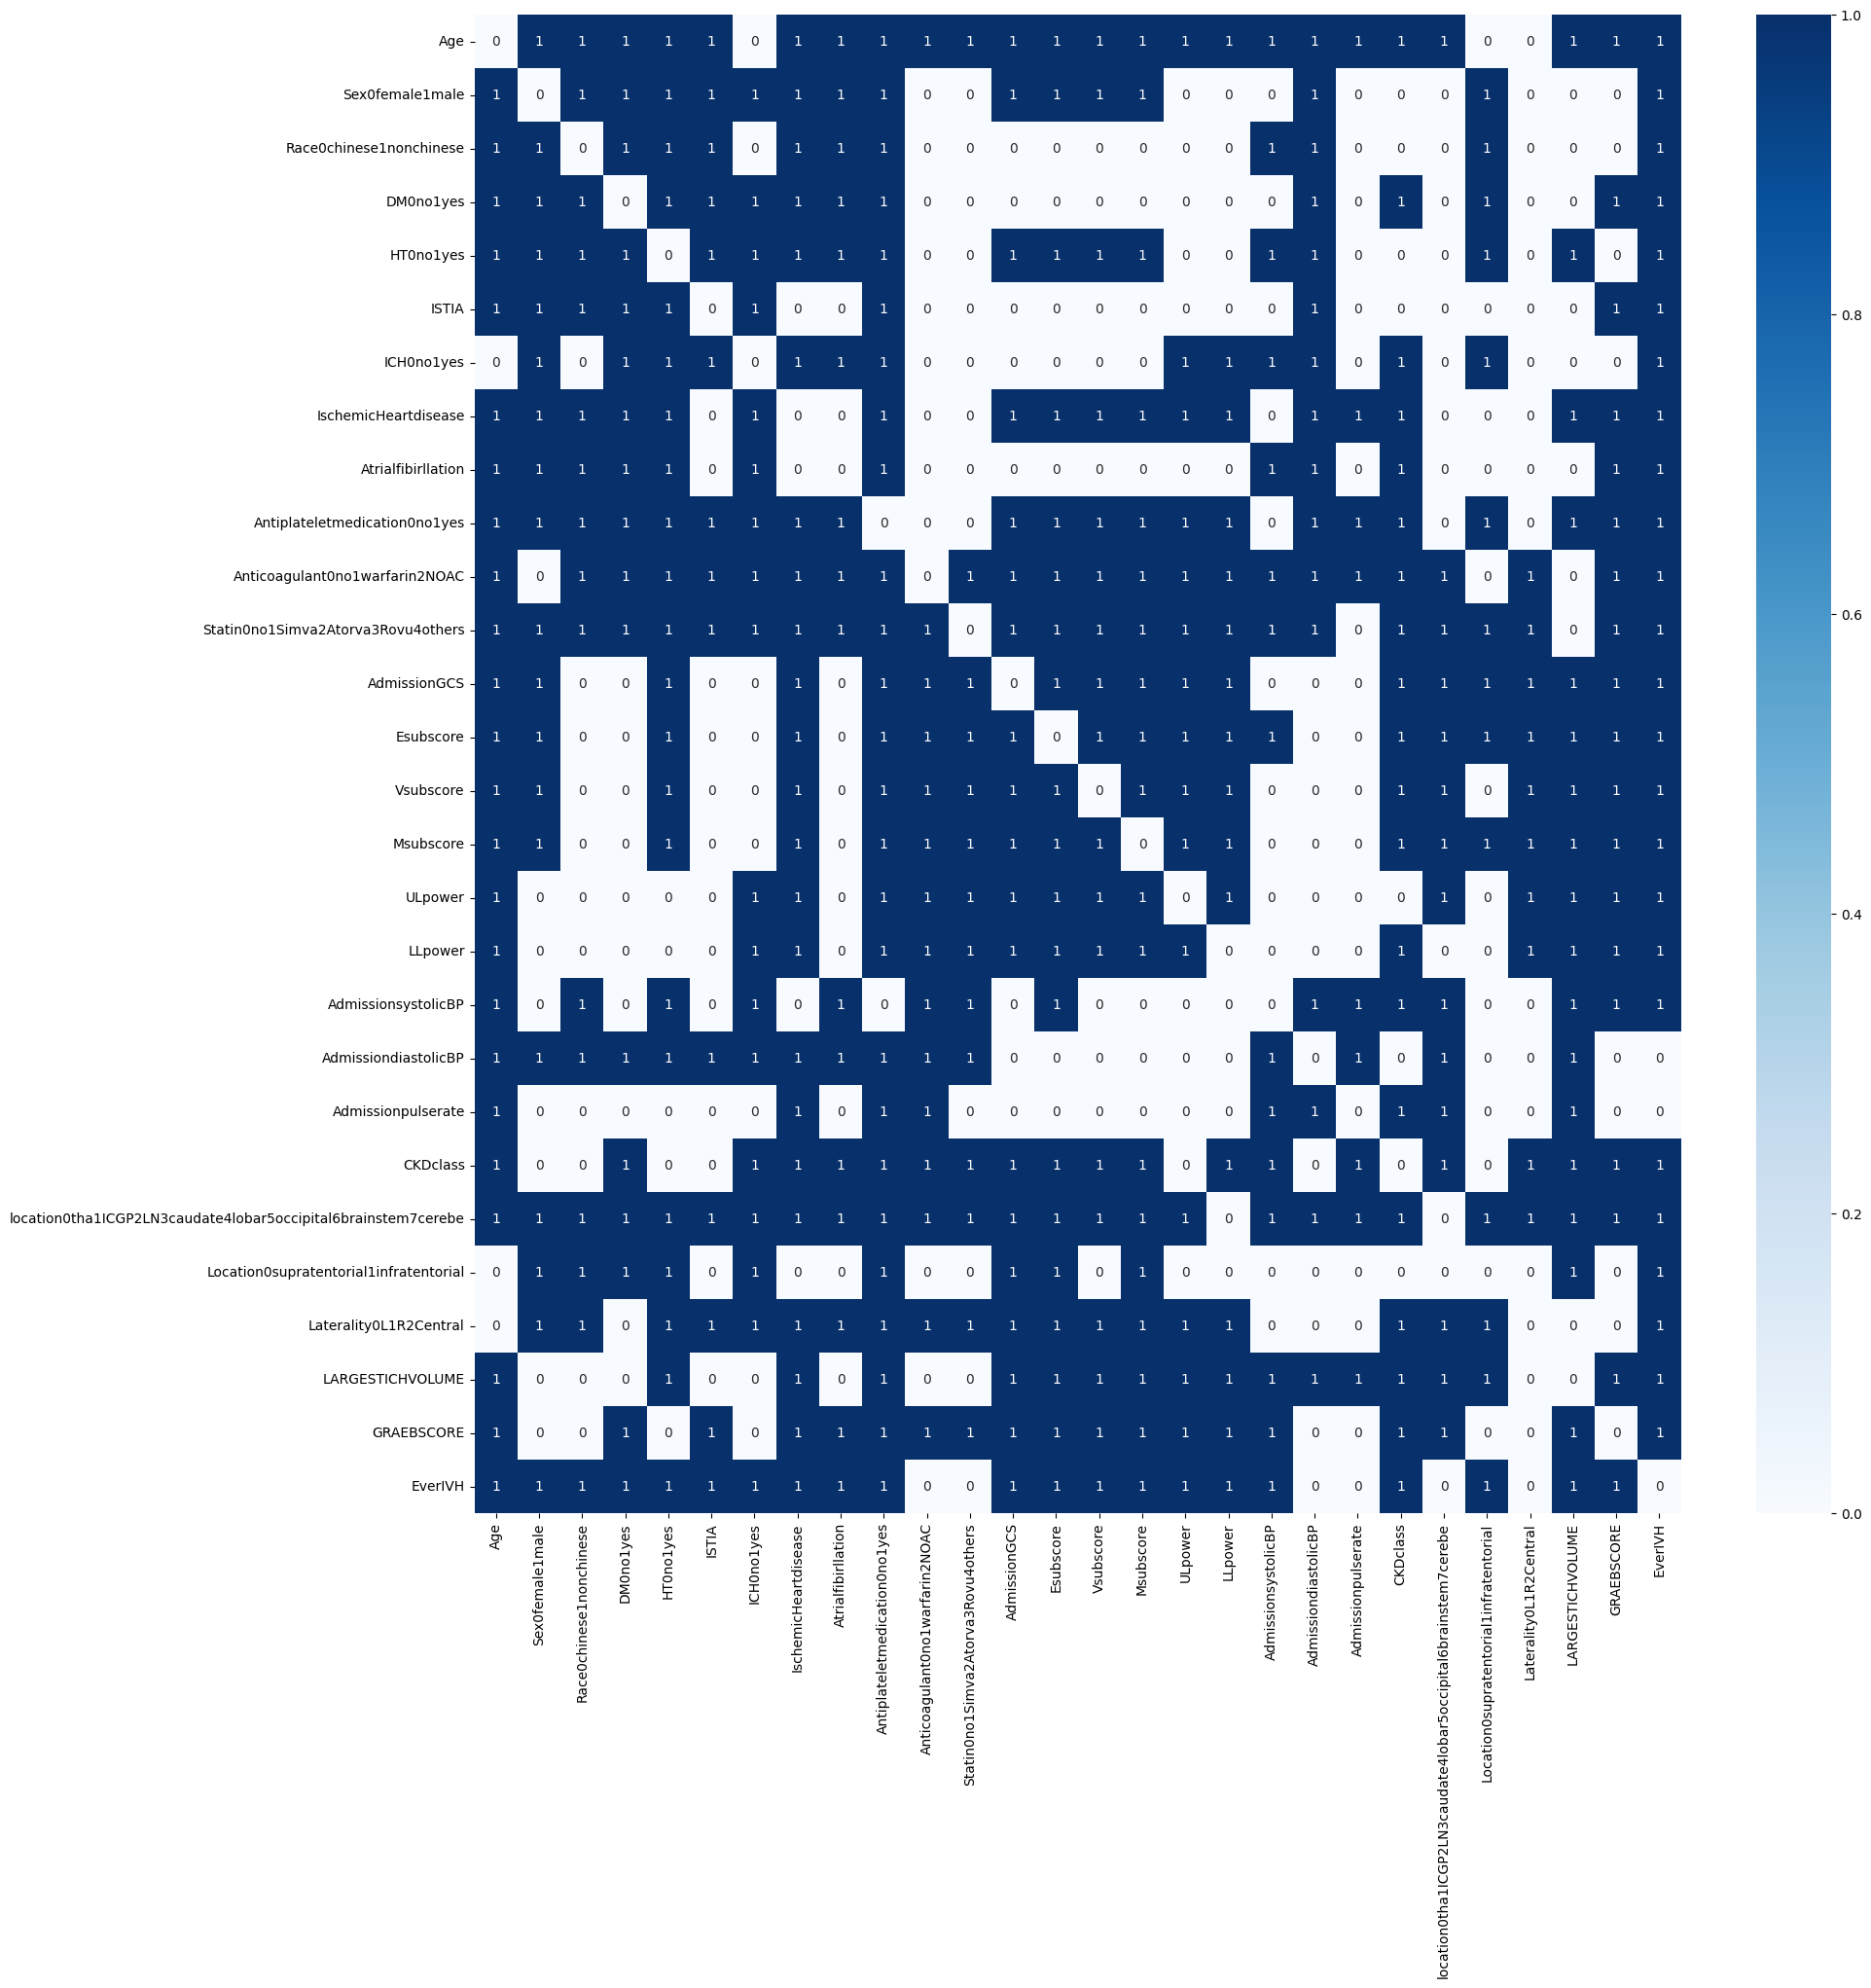

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='Blues', ax=ax)
plt.show()

In [21]:
correlation.sum()

Age                                                              24
Sex0female1male                                                  19
Race0chinese1nonchinese                                          16
DM0no1yes                                                        17
HT0no1yes                                                        22
ISTIA                                                            14
ICH0no1yes                                                       18
IschemicHeartdisease                                             23
Atrialfibirllation                                               16
Antiplateletmedication0no1yes                                    26
Anticoagulant0no1warfarin2NOAC                                   15
Statin0no1Simva2Atorva3Rovu4others                               14
AdmissionGCS                                                     19
Esubscore                                                        20
Vsubscore                                       

Remove: Antiplateletmedication0no1yes, EverIVH, IschemicHeartdisease, HT0no1yes

In [28]:
correlation = correlation.drop('HT0no1yes', axis=1)
correlation = correlation.drop('HT0no1yes', axis=0)

In [29]:
correlation.sum()

Age                                                              20
Sex0female1male                                                  15
Race0chinese1nonchinese                                          12
DM0no1yes                                                        13
ISTIA                                                            11
ICH0no1yes                                                       14
Atrialfibirllation                                               13
Anticoagulant0no1warfarin2NOAC                                   15
Statin0no1Simva2Atorva3Rovu4others                               14
AdmissionGCS                                                     15
Esubscore                                                        16
Vsubscore                                                        14
Msubscore                                                        15
ULpower                                                          13
LLpower                                         

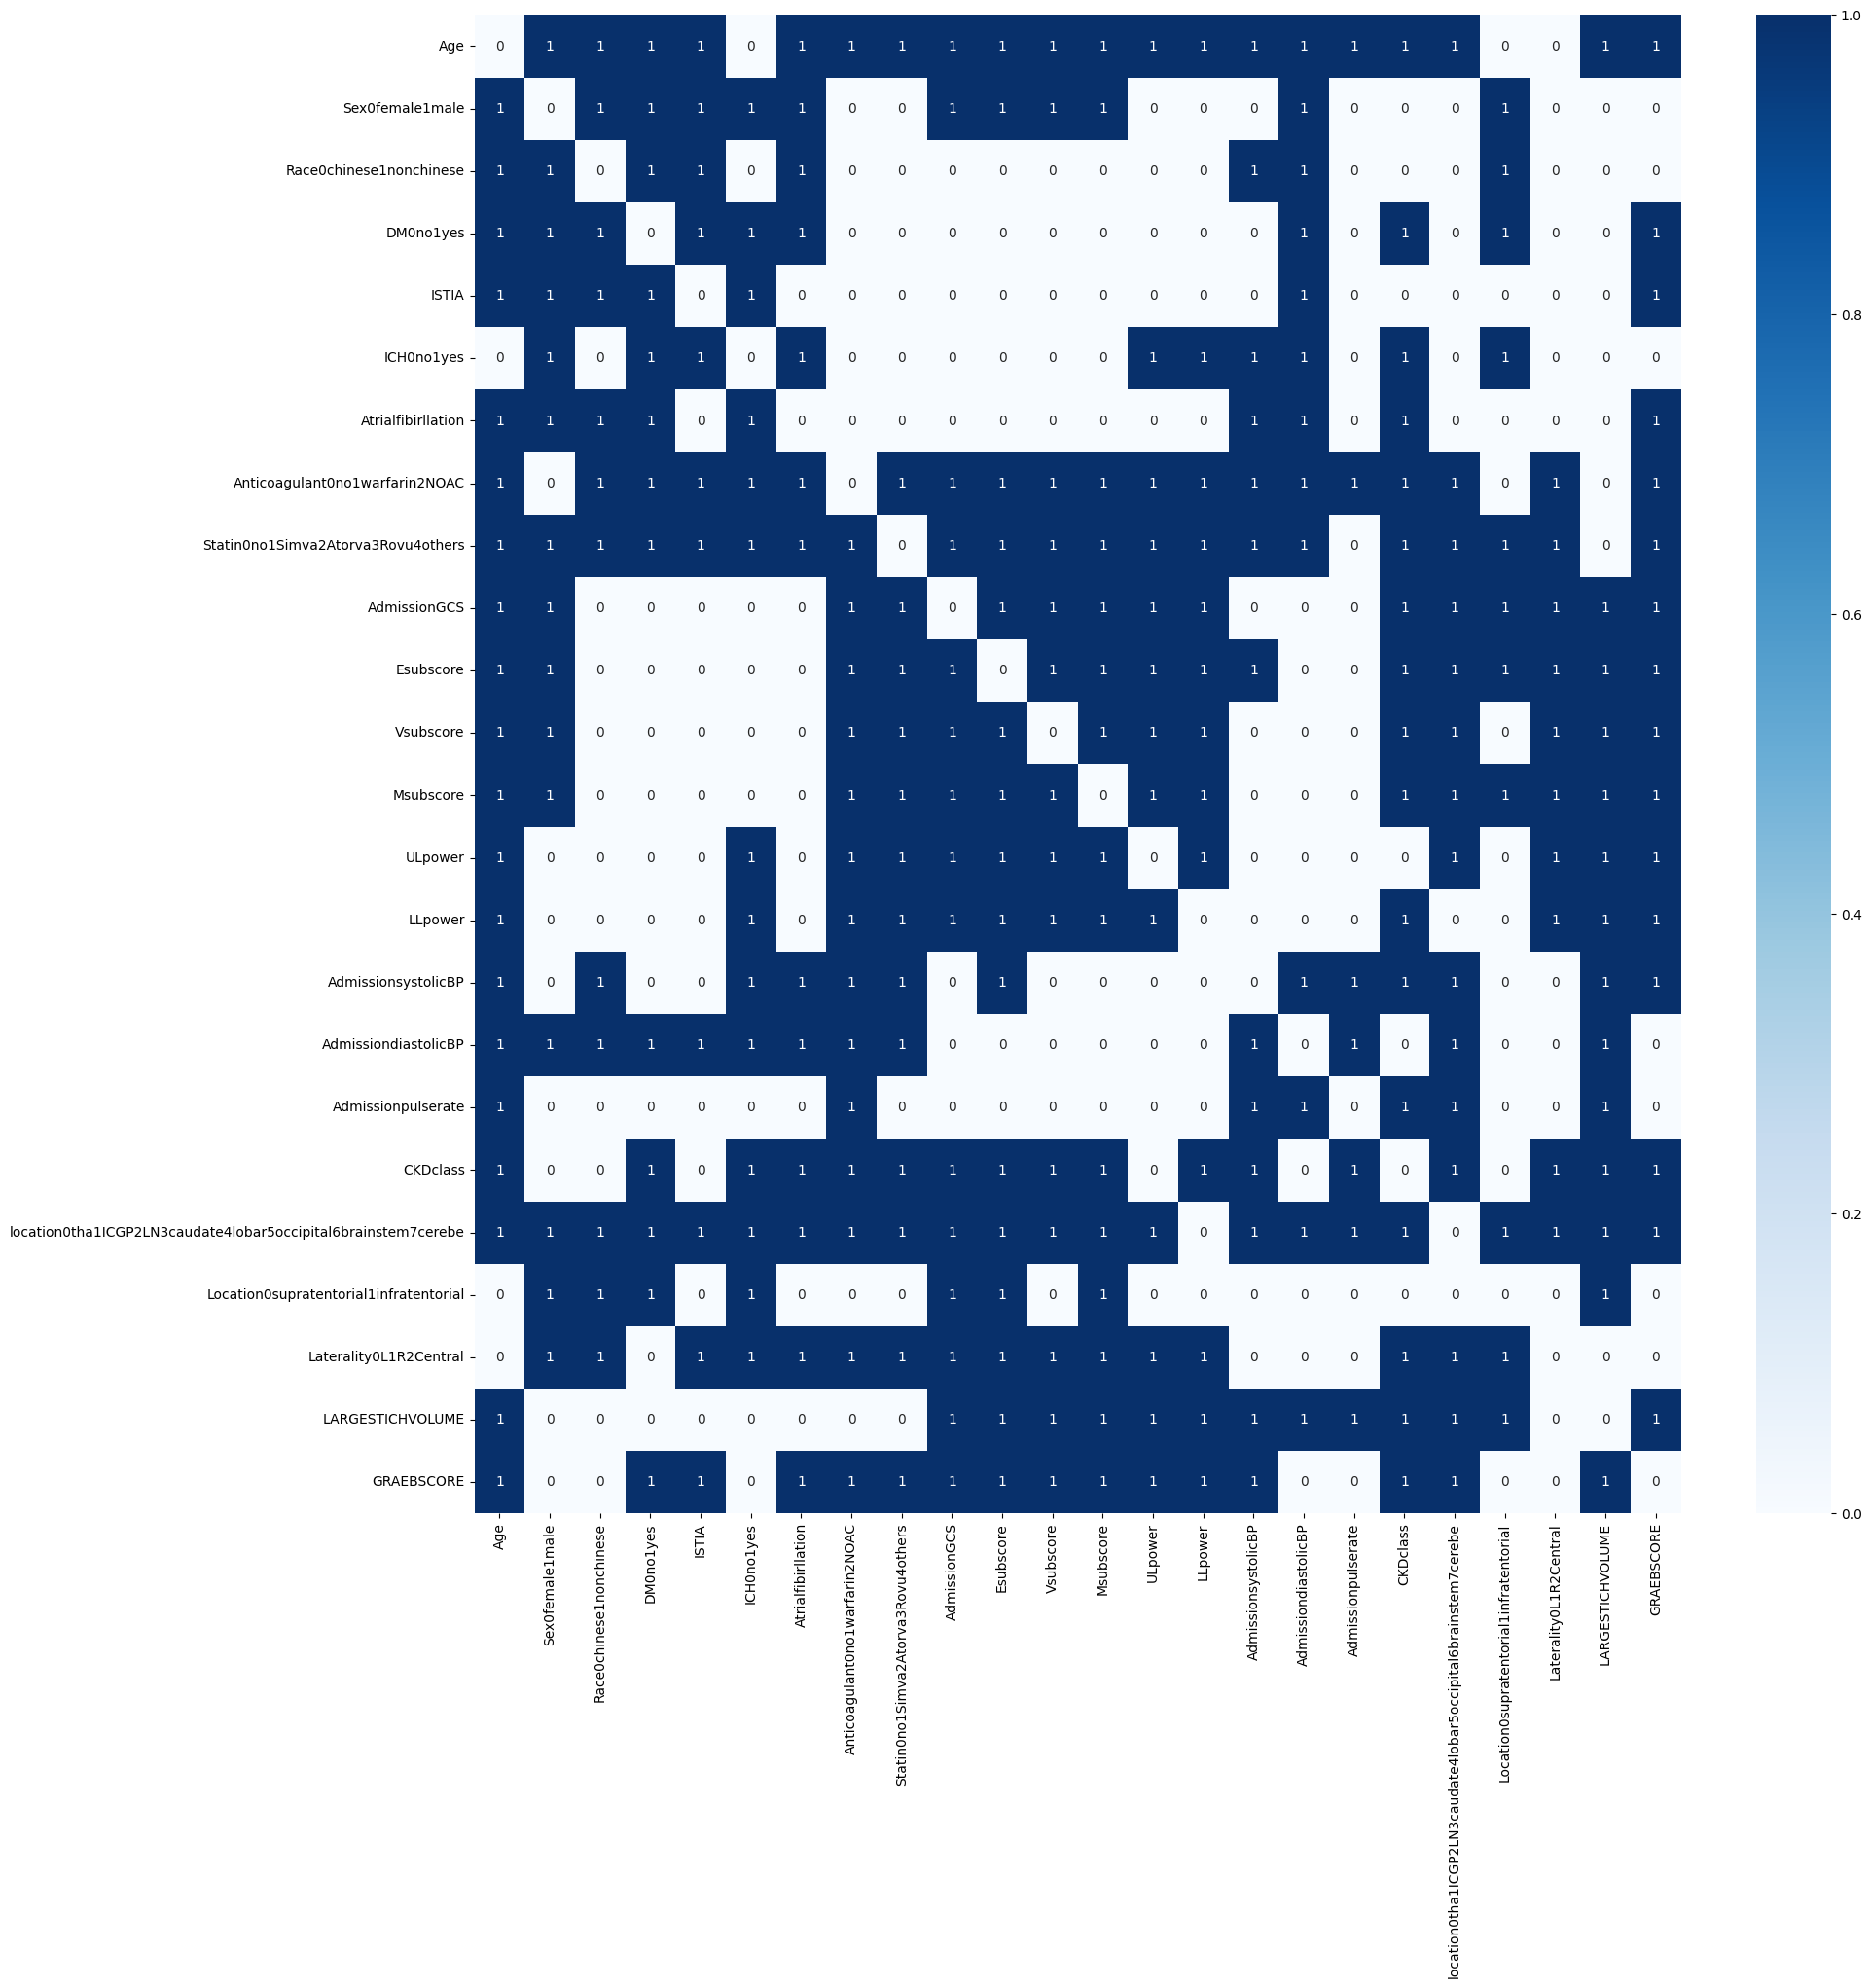

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='Blues', ax=ax)
plt.show()